In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import sys

SMALL_SIZE=10
MEDIUM_SIZE=15
BIGGER_SIZE=20
BIGGEST_SIZE=25
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGEST_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
data = pd.read_csv("D:/Shared by Pankaj/OneDrive_2020-08-13/August 2019 Light sheet/Ki67/Ki67countsnew.csv")
data_copy=pd.read_csv("D:/Shared by Pankaj/OneDrive_2020-08-13/August 2019 Light sheet/Ki67/Ki67countsnew.csv")

In [3]:
columns_titles = ['C 24h','S5 24h','S6 24h','S7 24h','S8 24h', 'S21 24h', 'S22 24h', 'S24 24h', 'C 48h', 'S5 48h', 'S8 48h', 'S22 48h', 'S23 48h']
data=data.reindex(columns=columns_titles)
columns_titles_two=['S5 24h', 'S5 48h', 'S8 24h', 'S8 48h', 'S22 24h', 'S22 48h']
secondary_data=data.reindex(columns=columns_titles_two)

In [4]:
y=[]
for key in list(data.keys()):
    y.append(np.array(data[key][:np.count_nonzero(~np.isnan(data[key]))]))
    
x=[]
for key in list(data.keys()):
    x.append(key)

In [5]:
mean=[]
sem=[]
for i in range(0, len(x)):
    average=np.nanmean(y[i])
    mean.append(average)
    serrm=(np.nanstd(y[i]))/np.sqrt(len(y[i]))
    sem.append(serrm)

thresholdval=np.nanmean(mean)

mean24=mean[0:8].copy()
mean48=mean[8:len(mean)].copy()

sem24=sem[0:8].copy()
sem48=sem[8:len(mean)].copy()

In [6]:
def tidy(x, n):
    y=abs(x)
    if y <= sys.float_info.min: return 0.0
    return round( x, int( n-math.ceil(math.log10(y)) ) )

# Welsch T test and p value

p=[]
for i in range(0, 8):
    tval, pval=stats.ttest_ind(y[0],y[i], equal_var=False)
    pval=tidy(pval,2)
    p.append(pval)
for i in range(8, len(y)):
    tval, pval=stats.ttest_ind(y[8],y[i], equal_var=False)
    pval=tidy(pval,2)
    p.append(pval)

c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


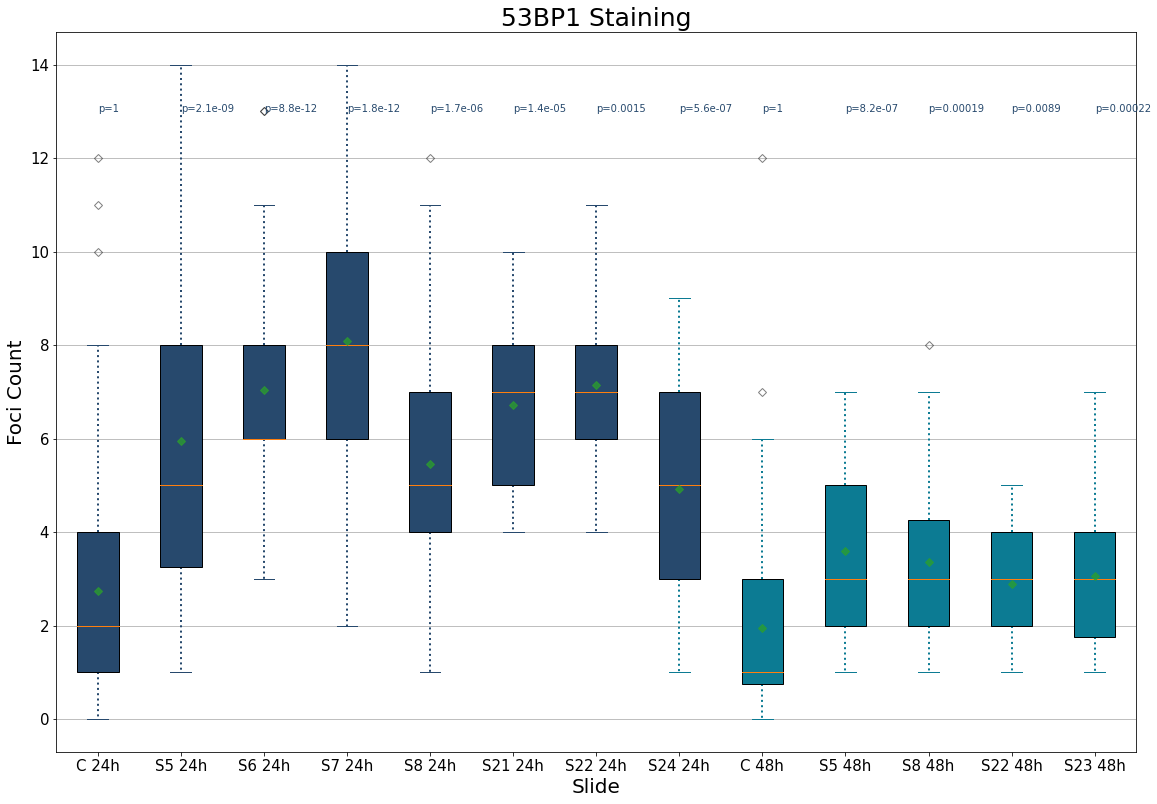

In [7]:
colors=['#142850','#27496D','#0C7B93','#00A8CC']
fig=plt.figure(figsize=(15,10))
ax=fig.add_axes([0,0,1,1])
bp=ax.boxplot(y,vert=True, patch_artist=True, showfliers=True, showmeans=True,labels=x)
for i in range(0, len(y)):
    ax.text(i+1,13, 'p=%g' %(p[i]) ,fontsize=10,color=colors[1])
ax.set_title('53BP1 Staining')
ax.set_xlabel('Slide')
ax.set_ylabel('Foci Count')
ax.yaxis.grid(True)

for flier in bp['fliers']:
    flier.set(marker='D', color=colors[2], alpha=0.5)
    
for boxes in bp['boxes'][:8]:
    boxes.set_facecolor(colors[1])
for boxes in bp['boxes'][8:]:
    boxes.set_facecolor(colors[2])
    
for caps in bp['caps'][:14]:
    caps.set(color=colors[1], linewidth=1)
for caps in bp['caps'][14:]:
    caps.set(color=colors[2], linewidth=1)
    
for whiskers in bp['whiskers'][:14]:
    whiskers.set(color=colors[1], linewidth=2, linestyle=':')
for whiskers in bp['whiskers'][14:]:
    whiskers.set(color=colors[2], linewidth=2, linestyle=':')
    
for mean in bp['means']:
    mean.set(marker='D', color='#F67280', alpha=0.75)
    
for median in bp['medians']:
    median.set()